Megan Cusey
Notes & reproducing code from Feature Engineering for Machine Learning by Alice Zheng & Amanda Casari, Chapter 2 published by O'Reily

## Quantization/Binning

In [2]:
import pandas as pd
import csv

In [3]:
biz_df = pd.read_csv('C://Users/cusey/source/repos/DataScienceCoursework/MDS 564 - 2020 Spring/Week 2 - Numeric Feature Selection/Yelp Reviews - 10000.csv')

In [4]:
print(biz_df)

                 business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg   1/26/2011  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow   7/27/2011  IjZ33sJrzXqU-0X6U8NwyA      5   
2     6oRAC4uyJCsJl1X0WZpVSA   6/14/2012  IESLBzqUCLdSzSqm0eCSxQ      4   
3     _1QQZuf4zZOyFCvXc0o6Vg   5/27/2010  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw    1/5/2012  1uJFq2r5QfJG_6ExMRCaGw      5   
...                      ...         ...                     ...    ...   
9995  VY_tvNUCCXGXQeSvJl757Q   7/28/2012  Ubyfp2RSDYW0g7Mbr8N3iA      3   
9996  EKzMHI1tip8rC1-ZAy64yg   1/18/2012  2XyIOQKbVFb6uXQdJ0RzlQ      4   
9997  53YGfwmbW73JhFiemNeyzQ  11/16/2010  jyznYkIbpqVmlsZxSDSypA      4   
9998  9SKdOoDHcFoxK5ZtsgHJoA   12/2/2012  5UKq9WQE1qQbJ0DJbc-B6Q      2   
9999  pF7uRzygyZsltbmVpjIyvw  10/16/2010  vWSmOhg2ID1MNZHaWapGbA      5   

                                                   text    type  \
0     My wife took me here on my

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Occurrence')

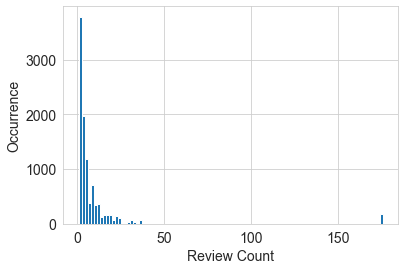

In [6]:
#Plot the histogram of the review counts
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

Question: Looking at the CSV file, it appears that the level of granularity is at the review level. A business or user can have multiple reviews on one or more days. This makes me misunderstand the review count. What is the review count? I navigated to Yelp.com to see if there was something else that makes sense here where a "review count" statistic would make sense for a single review. However, the best I came up with us maybe the review count belongs to the user. Each individual review can be marked as cool, useful, or funny, but the user has the # of reviews stat.

If the review count really belongs to the user, then the book is misusing the context of this column. The true review count would be an aggregate of the number of reviews grouped by business. How would we do this in Python?

In [7]:
## To continue @ later time.
##df_counts = biz_df[biz_df['business_id']].groupby('business_id').count()



Fixed Width Binning

In [8]:
import numpy as np

# Generate 20 random ints ranging from 0-99
small_counts = np.random.randint(0,100,20)
print(small_counts)

# Map to fixed width bins 0-9, divide by 10. If 92 = 9
print(np.floor_divide(small_counts,10))

large_counts = np.random.randint(50,100000,20)
print(large_counts)

# Map to exponential-width bins via log function
print(np.floor(np.log10(large_counts)))

[65 26 59 32 16 38 99 29 89 92 87 38 40 93 50 17 99 50 90 61]
[6 2 5 3 1 3 9 2 8 9 8 3 4 9 5 1 9 5 9 6]
[26819 28890 96336 99703 70556 39276 15458 72359 54811 67812 56657 19234
 64112 28200 63498 75591 90494 21373 11719 71560]
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


Quantile Binning

Text(0, 0.5, 'Occurence')

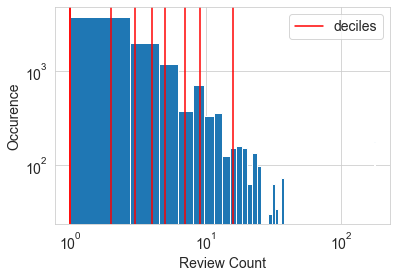

In [9]:
deciles = biz_df['review_count'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9])
deciles

# Visualize the deciles on the histogram
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax,bins=100)
for pos in deciles:
        handle = plt.axvline(pos,color='r')
ax.legend([handle],['deciles'],fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurence', fontsize=14)

In [10]:
# Example 2-5 Binning counts by quantiles

pd.qcut(large_counts,4,labels=False)
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([.25,.5,.75])

0.25    27854.75
0.50    60077.50
0.75    71759.75
dtype: float64

## Log Transformation

Text(0, 0.5, 'Occurence')

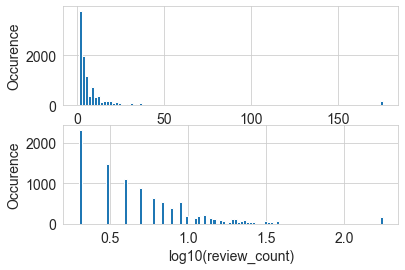

In [11]:
# Example 2-6, Compare the distribution of Yelp review counts before and after log transformation

fig, (ax1, ax2) = plt.subplots(2,1)
biz_df['review_count'].hist(ax=ax1,bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count',fontsize=14)
ax1.set_ylabel('Occurence',fontsize=14)

# Add 1 to raw count so that the log doesn't try to calc
# to negative infinitiy if the count = 0
biz_df['log_review_count'] = np.log10(biz_df['review_count']+1)

biz_df['log_review_count'].hist(ax=ax2,bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count)',fontsize=14)
ax2.set_ylabel('Occurence',fontsize=14)


C:\Users\cusey\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Number of Articles')

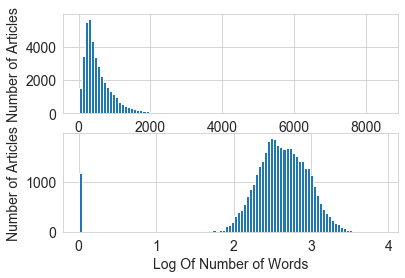

In [12]:
# Example 2-7 Compare number of words distribution for news articles before and after log transformation

news_df = pd.read_csv('C://Users/cusey/source/repos/DataScienceCoursework/MDS 564 - 2020 Spring/Week 2 - Numeric Feature Selection/OnlineNewsPopularity.csv',delimiter=', ')

fig, (ax1, ax2) = plt.subplots(2,1)
news_df['n_tokens_content'].hist(ax=ax1,bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article',fontsize=14)
ax1.set_ylabel('Number of Articles',fontsize=14)

news_df['log_n_tokens_content'] = np.log10(news_df['n_tokens_content']+1)

news_df['log_n_tokens_content'].hist(ax=ax2,bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log Of Number of Words',fontsize=14)
ax2.set_ylabel('Number of Articles',fontsize=14)


## Linear Regression Examples w/ & Without Log Transformations

In [13]:
## Example 2-8, comparing linear regression results of Yelp star ratings when review count is in original and log transformed form.

from sklearn import linear_model
from sklearn.model_selection import cross_val_score

# Train linear regression model to predict average start
# rating using review_count w/ and w/o log transformation

# Linear Regression on original data w/ a 10-fold cross validation
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count']],
                             biz_df['stars'], cv=10)

# Linear Regression on log transformed data w/ a 10-fold cross validation
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']], 
                            biz_df['stars'], cv=10)
print("R-Squared score w/o log transform: %0.5f (+/- %0.5f)" 
     % (scores_orig.mean(), scores_orig.std() *2))
print("R-Squared score w log transform: %0.5f (+/- %0.5f)" 
     % (scores_log.mean(), scores_log.std() *2))

R-Squared score w/o log transform: -0.00005 (+/- 0.00351)
R-Squared score w log transform: 0.00635 (+/- 0.00565)


In [14]:
## Example 2-9 comparing linear regression model results of news article
## shares when word count is in original and log transformed form
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, news_df[['n_tokens_content']],
                              news_df['shares'],cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, news_df[['log_n_tokens_content']],
                            news_df['shares'],cv=10)
print("R-Squared score w/o log transform: %0.5f (+/- %.05f)" 
     % (scores_orig.mean(), scores_orig.std() * 2))
print("R-Squared score w/ log transform: %0.5f (+/- %.05f)"
     % (scores_log.mean(), scores_log.std() * 2))

R-Squared score w/o log transform: -0.00242 (+/- 0.00509)
R-Squared score w/ log transform: -0.00114 (+/- 0.00418)


Text(0, 0.5, 'Number of Shares')

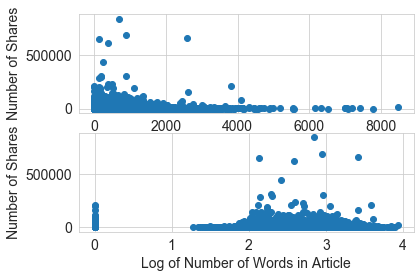

In [15]:
## Example 2-10 Visualizing the correlation of the independent (number of words in article) and shares (dependent) variables 
fig2, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(news_df['n_tokens_content'], news_df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2.scatter(news_df['log_n_tokens_content'], news_df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Number of Words in Article',fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

Text(0, 0.5, 'Average Star Rating')

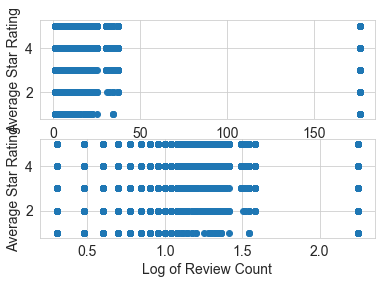

In [16]:
# Example 2-11, Visualizing the correlation between dependent (Star Rating) and independent (Review Count)
fig, (ax1,ax2) = plt.subplots(2,1)
ax1.scatter(biz_df['review_count'],biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating',fontsize=14)

ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)

In [17]:
# Example 2-12, Box Cox Transformations
# Box-Cox transform of Yelp Reviews
from scipy import stats

# Box Cox assumes positive data, check min to make sure
print('Min review Count: ', biz_df['review_count'].min())

# Min = 1, positive data

## if the lamba = 0 on Box-Cox transformation, the result is the log transform
rc_log = stats.boxcox(biz_df['review_count'],lmbda=0)

# scipy implementation will try to find the lamda parameter that will result in
# the closest to a normal distribution when lambda isn't specifically specified
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
print('Lambda: ', bc_params)

Min review Count:  1
Lambda:  -0.25282122822356073


Text(0, 0.5, 'Occurrence')

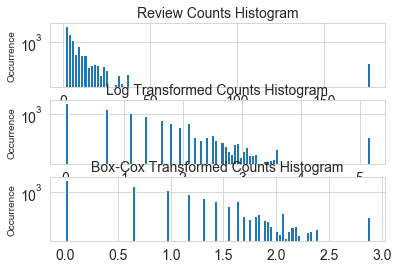

In [18]:
# Example 2-13: Visualize original, log transformed, and Box Cox transformed review counts

biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

fig, (ax1, ax2, ax3) = plt.subplots(3,1)

## original data chart
biz_df['review_count'].hist(ax=ax1,bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence')

## log transform data chart
biz_df['rc_log'].hist(ax=ax2,bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence')

## Box Cox transform data chart
biz_df['rc_bc'].hist(ax=ax3,bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence')

Text(0.5, 1.0, 'ProbPlot after Box-Cox transformation')

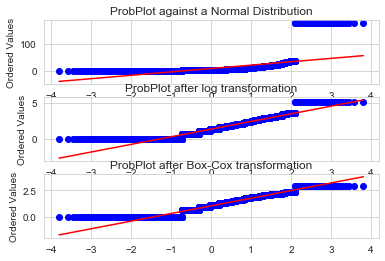

In [19]:
## Example 2-14 Probability plots of original and transformed counts against the normal distribution

fig2, (ax1, ax2, ax3) = plt.subplots(3,1)
prob1 = stats.probplot(biz_df['review_count'],dist=stats.norm,plot=ax1)
ax1.set_xlabel('')
ax1.set_title('ProbPlot against a Normal Distribution')
prob2 = stats.probplot(biz_df['rc_log'],dist=stats.norm,plot=ax2)
ax2.set_xlabel('')
ax2.set_title('ProbPlot after log transformation')
prob3 = stats.probplot(biz_df['rc_bc'],dist=stats.norm,plot=ax3)
ax3.set_xlabel('')
ax3.set_title('ProbPlot after Box-Cox transformation')

## Feature Scaling

In [20]:
#Example 2-15 Feature Scaling
import sklearn.preprocessing as preproc

print('original values: ',news_df['n_tokens_content'].values)

# min-max scaling
news_df['minmax'] = preproc.minmax_scale(news_df[['n_tokens_content']])

print('min/max values: ',news_df['minmax'].values)

# standardization scaling
news_df['standardized']  = preproc.StandardScaler().fit_transform(news_df[['n_tokens_content']])
print('standardized values: ', news_df['standardized'].values)

#l2 normalization
news_df['l2_normalized'] = preproc.normalize(news_df[['n_tokens_content']],axis=0)
print('l2 normalization values: ', news_df['l2_normalized'].values)

original values:  [219. 255. 211. ... 442. 682. 157.]
min/max values:  [0.02584376 0.03009205 0.02489969 ... 0.05215955 0.08048147 0.01852726]
standardized values:  [-0.69521045 -0.61879381 -0.71219192 ... -0.2218518   0.28759248
 -0.82681689]
l2 normalization values:  [0.00152439 0.00177498 0.00146871 ... 0.00307663 0.0047472  0.00109283]


Text(29.125, 0.5, 'Number of articles')

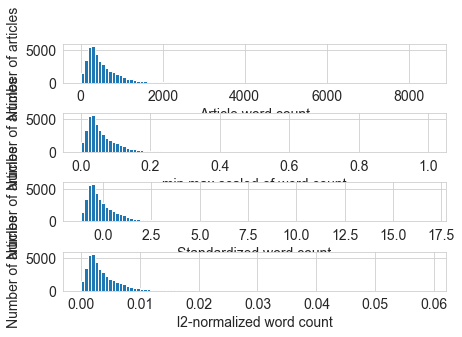

In [21]:
# Example 2-16 - Plot original and scaled data

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)
fig.tight_layout()

##original
news_df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

## min/max
news_df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('min max scaled of word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)

## standardized
news_df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)

## l2-normalized
news_df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('l2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)


In [23]:
# Example 2-17, Example of interaction features for prediction
from sklearn.model_selection import train_test_split

news_df.columns

# select content features as sington features, skip over derived features
features = ['n_tokens_title', 'n_tokens_content',
            'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
            'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
            'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
            'data_channel_is_entertainment', 'data_channel_is_bus',
            'data_channel_is_socmed', 'data_channel_is_tech',
            'data_channel_is_world']

x=news_df[features]
y=news_df[['shares']]

print('Original # of Rows, Features: ', x.shape)

## create pairwise interaction features
x2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(x)
print('# of Rows, Features after Pairwise Interaction Features: ', x2.shape)

## Create train/test sets for both feature sets
x1_train, x1_test, x2_train, x2_test, y_train, y_test = train_test_split(x,x2, y, test_size=0.3,random_state=123)

def evaluate_feature(x_train, x_test, y_train, y_test):
    model = linear_model.LinearRegression().fit(x_train, y_train)
    r_score = model.score(x_test,y_test)
    return (model, r_score)

# train models and compare scores on the 2 feature sets
(m1,r1) = evaluate_feature(x1_train,x1_test,y_train,y_test)
(m2,r2) = evaluate_feature(x2_train,x2_test,y_train,y_test)

print("R-squared score w/ singleton features: %0.5f" % r1)
print("R-squared score w/ pairwise features: %0.10f" % r2)

Original # of Rows, Features:  (39644, 17)
# of Rows, Features after Pairwise Interaction Features:  (39644, 170)
R-squared score w/ singleton features: 0.00924
R-squared score w/ pairwise features: 0.0113258850
